In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\gene_expression.csv')
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

In [5]:
df.dtypes

Gene One          float64
Gene Two          float64
Cancer Present      int64
dtype: object

In [6]:
df.shape

(3000, 3)

# Exploratory Data Analysis

In [7]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gene One'>

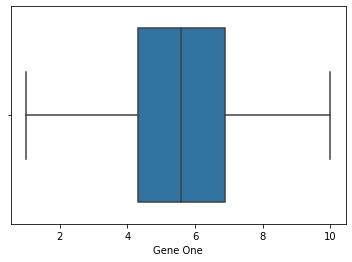

In [8]:
sns.boxplot(df['Gene One'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gene Two'>

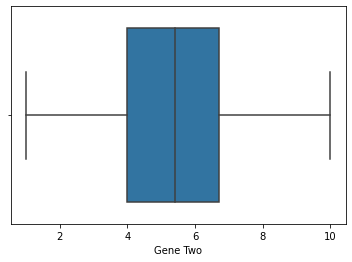

In [9]:
sns.boxplot(df['Gene Two'])

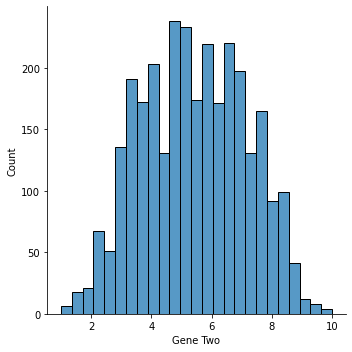

In [10]:
sns.displot(df['Gene Two'])

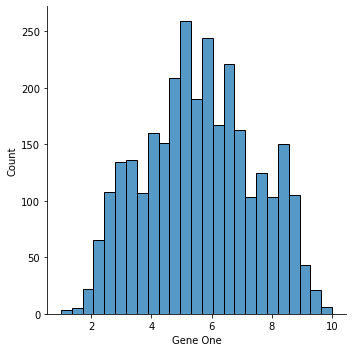

In [11]:
sns.displot(df['Gene One'])

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene One'>

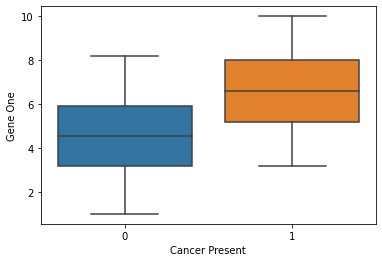

In [12]:
sns.boxplot(x='Cancer Present',y='Gene One',data=df)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene Two'>

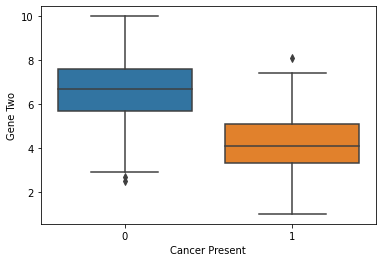

In [13]:
sns.boxplot(x='Cancer Present',y='Gene Two',data=df)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

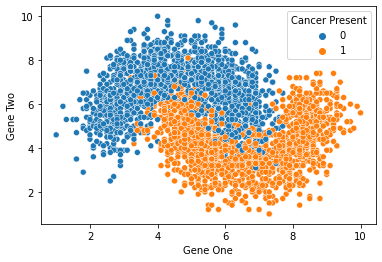

In [14]:
sns.scatterplot(x='Gene One',y='Gene Two', hue= 'Cancer Present',data=df)

In [15]:
df.corr()

Gene One  Gene Two  Cancer Present
Gene One        1.000000 -0.375427        0.545854
Gene Two       -0.375427  1.000000       -0.692352
Cancer Present  0.545854 -0.692352        1.000000

In [16]:
df['Gene One'].skew()

0.0270424877389434

In [17]:
df['Gene Two'].skew()

0.0028707848389388888

<AxesSubplot:>

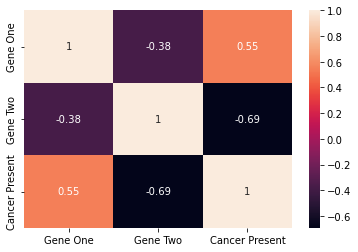

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [20]:
X= df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

# train_test split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# modeling with default parameter

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# model
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))

# cross validation score

from sklearn.model_selection import cross_val_score
score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()

0.9277777777777778
0.9428571428571428
[0.91333333 0.93       0.92833333 0.93       0.93166667]


0.9266666666666665

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))

0.9277777777777778
0.9428571428571428


In [27]:
test_acc = []
for k in range(1,31):
    knn_model=KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train,y_train)
    train_prediction= knn_model.predict(X_train)
    test_prediction= knn_model.predict(X_test)
    test_accuracy=accuracy_score(y_test,test_prediction)
    test_acc.append(test_accuracy)

test_acc

[0.9011111111111111,
 0.9022222222222223,
 0.9266666666666666,
 0.9244444444444444,
 0.9277777777777778,
 0.9355555555555556,
 0.9355555555555556,
 0.9388888888888889,
 0.9422222222222222,
 0.9377777777777778,
 0.9388888888888889,
 0.94,
 0.9388888888888889,
 0.9377777777777778,
 0.9411111111111111,
 0.9422222222222222,
 0.9433333333333334,
 0.9444444444444444,
 0.9477777777777778,
 0.9466666666666667,
 0.9455555555555556,
 0.9488888888888889,
 0.9455555555555556,
 0.9455555555555556,
 0.9433333333333334,
 0.9444444444444444,
 0.9444444444444444,
 0.9422222222222222,
 0.9433333333333334,
 0.9477777777777778]

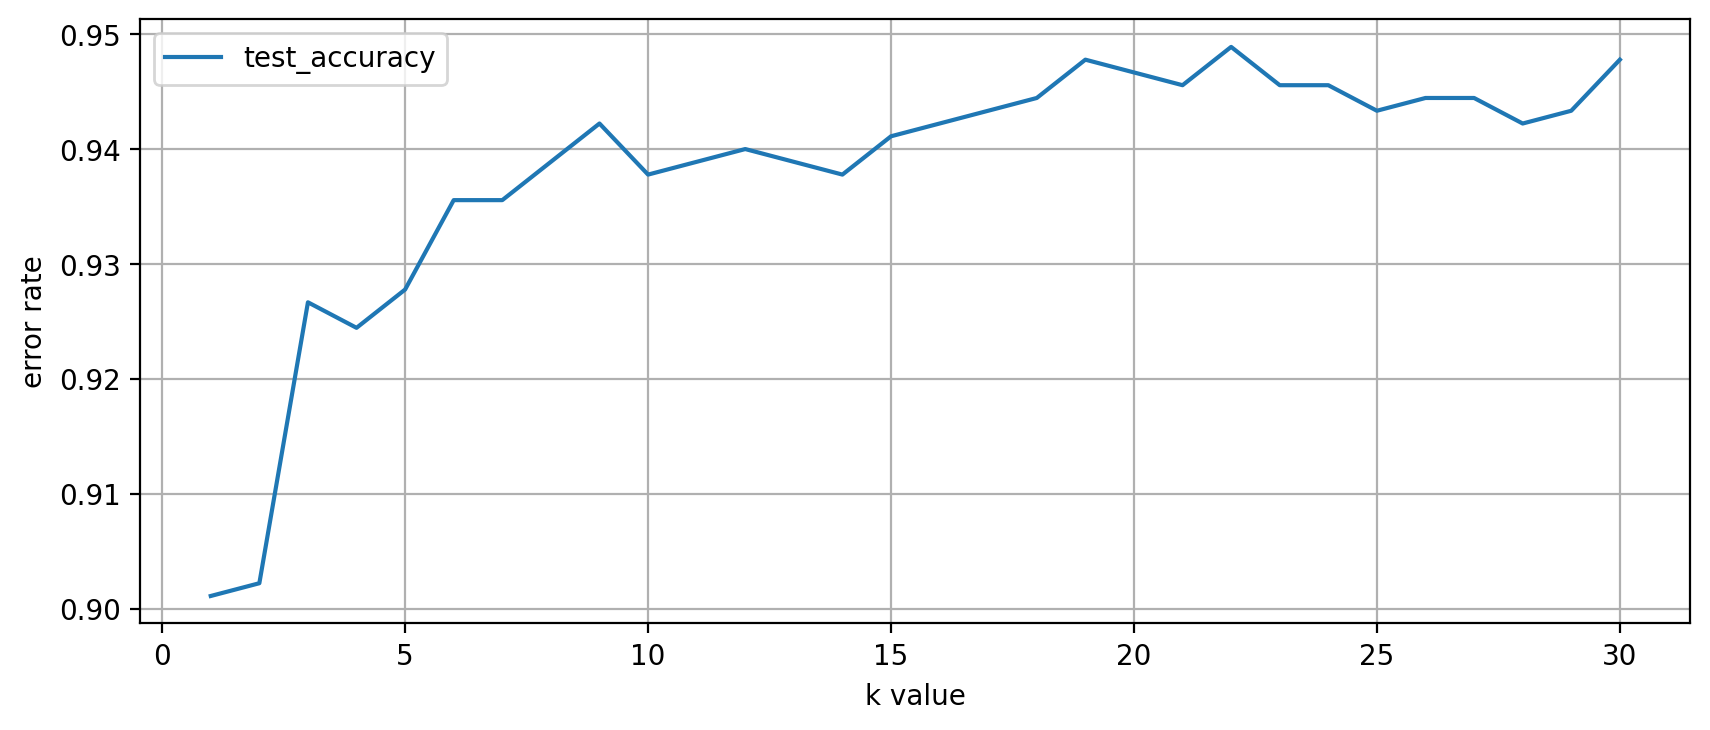

In [28]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),test_acc,label='test_accuracy')
plt.grid()
plt.ylabel('error rate')
plt.xlabel('k value')
plt.legend()

# modeling- hyperparameter tuning for KNN classifier

In [29]:
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()
param_grid= {'n_neighbors' : list(range(1,31)),'p':[1,2]}

Hp_knn= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_knn.fit(X_train,y_train)

Hp_knn.best_params_

{'n_neighbors': 20, 'p': 2}

# rebuilt KNN model with best hyperparameter tunning

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=20,p=2)

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))


score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()


0.9466666666666667
0.9338095238095238
[0.92666667 0.94666667 0.93166667 0.92833333 0.935     ]


0.9336666666666666

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[451,  19],
       [ 29, 401]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


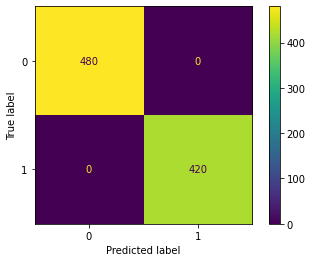

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,test_prediction)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



# logistic Regression

In [34]:
df1=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\gene_expression.csv')
df1.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [35]:
X = df1.drop('Cancer Present',axis=1)
y=df1['Cancer Present']

# train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

# scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# modeling- with default parameter

In [38]:
from sklearn.linear_model import LogisticRegression
# modeling

log_model=LogisticRegression()
log_model.fit(X_train,y_train)

# prediction

train_prediction = log_model.predict(X_train)
test_prediction = log_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

# cross validation score

from sklearn.model_selection import cross_val_score

score = cross_val_score(log_model,X,y,cv=5)
print(score)

score.mean()

0.8561904761904762
0.8566666666666667
[0.85833333 0.875      0.85       0.86       0.84      ]


0.8566666666666667

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[400,  70],
       [ 59, 371]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


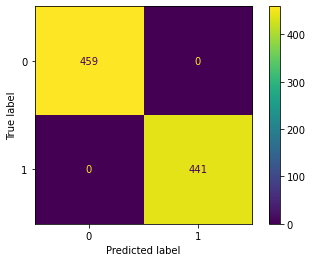

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,X_test,test_prediction)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       470
           1       0.84      0.86      0.85       430

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



# decision tree 

In [42]:
df2=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\gene_expression.csv')
df2.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [43]:
X = df2.drop('Cancer Present',axis=1)
y=df2['Cancer Present']

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
    
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))
   
score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

Train accuracy: 0.9785714285714285
Test accuracy: 0.8977777777777778
[0.89833333 0.91333333 0.9        0.91666667 0.89666667]


0.9049999999999999

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[400,  70],
       [ 59, 371]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


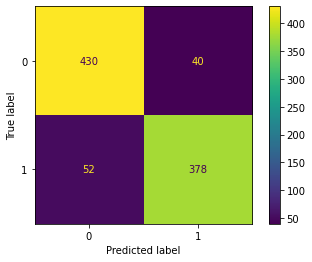

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,X_test,y_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       470
           1       0.84      0.86      0.85       430

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



In [50]:
dtc.feature_importances_

array([0.47517829, 0.52482171])

In [51]:
pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=['feature importance'])

feature importance
Gene One            0.475178
Gene Two            0.524822

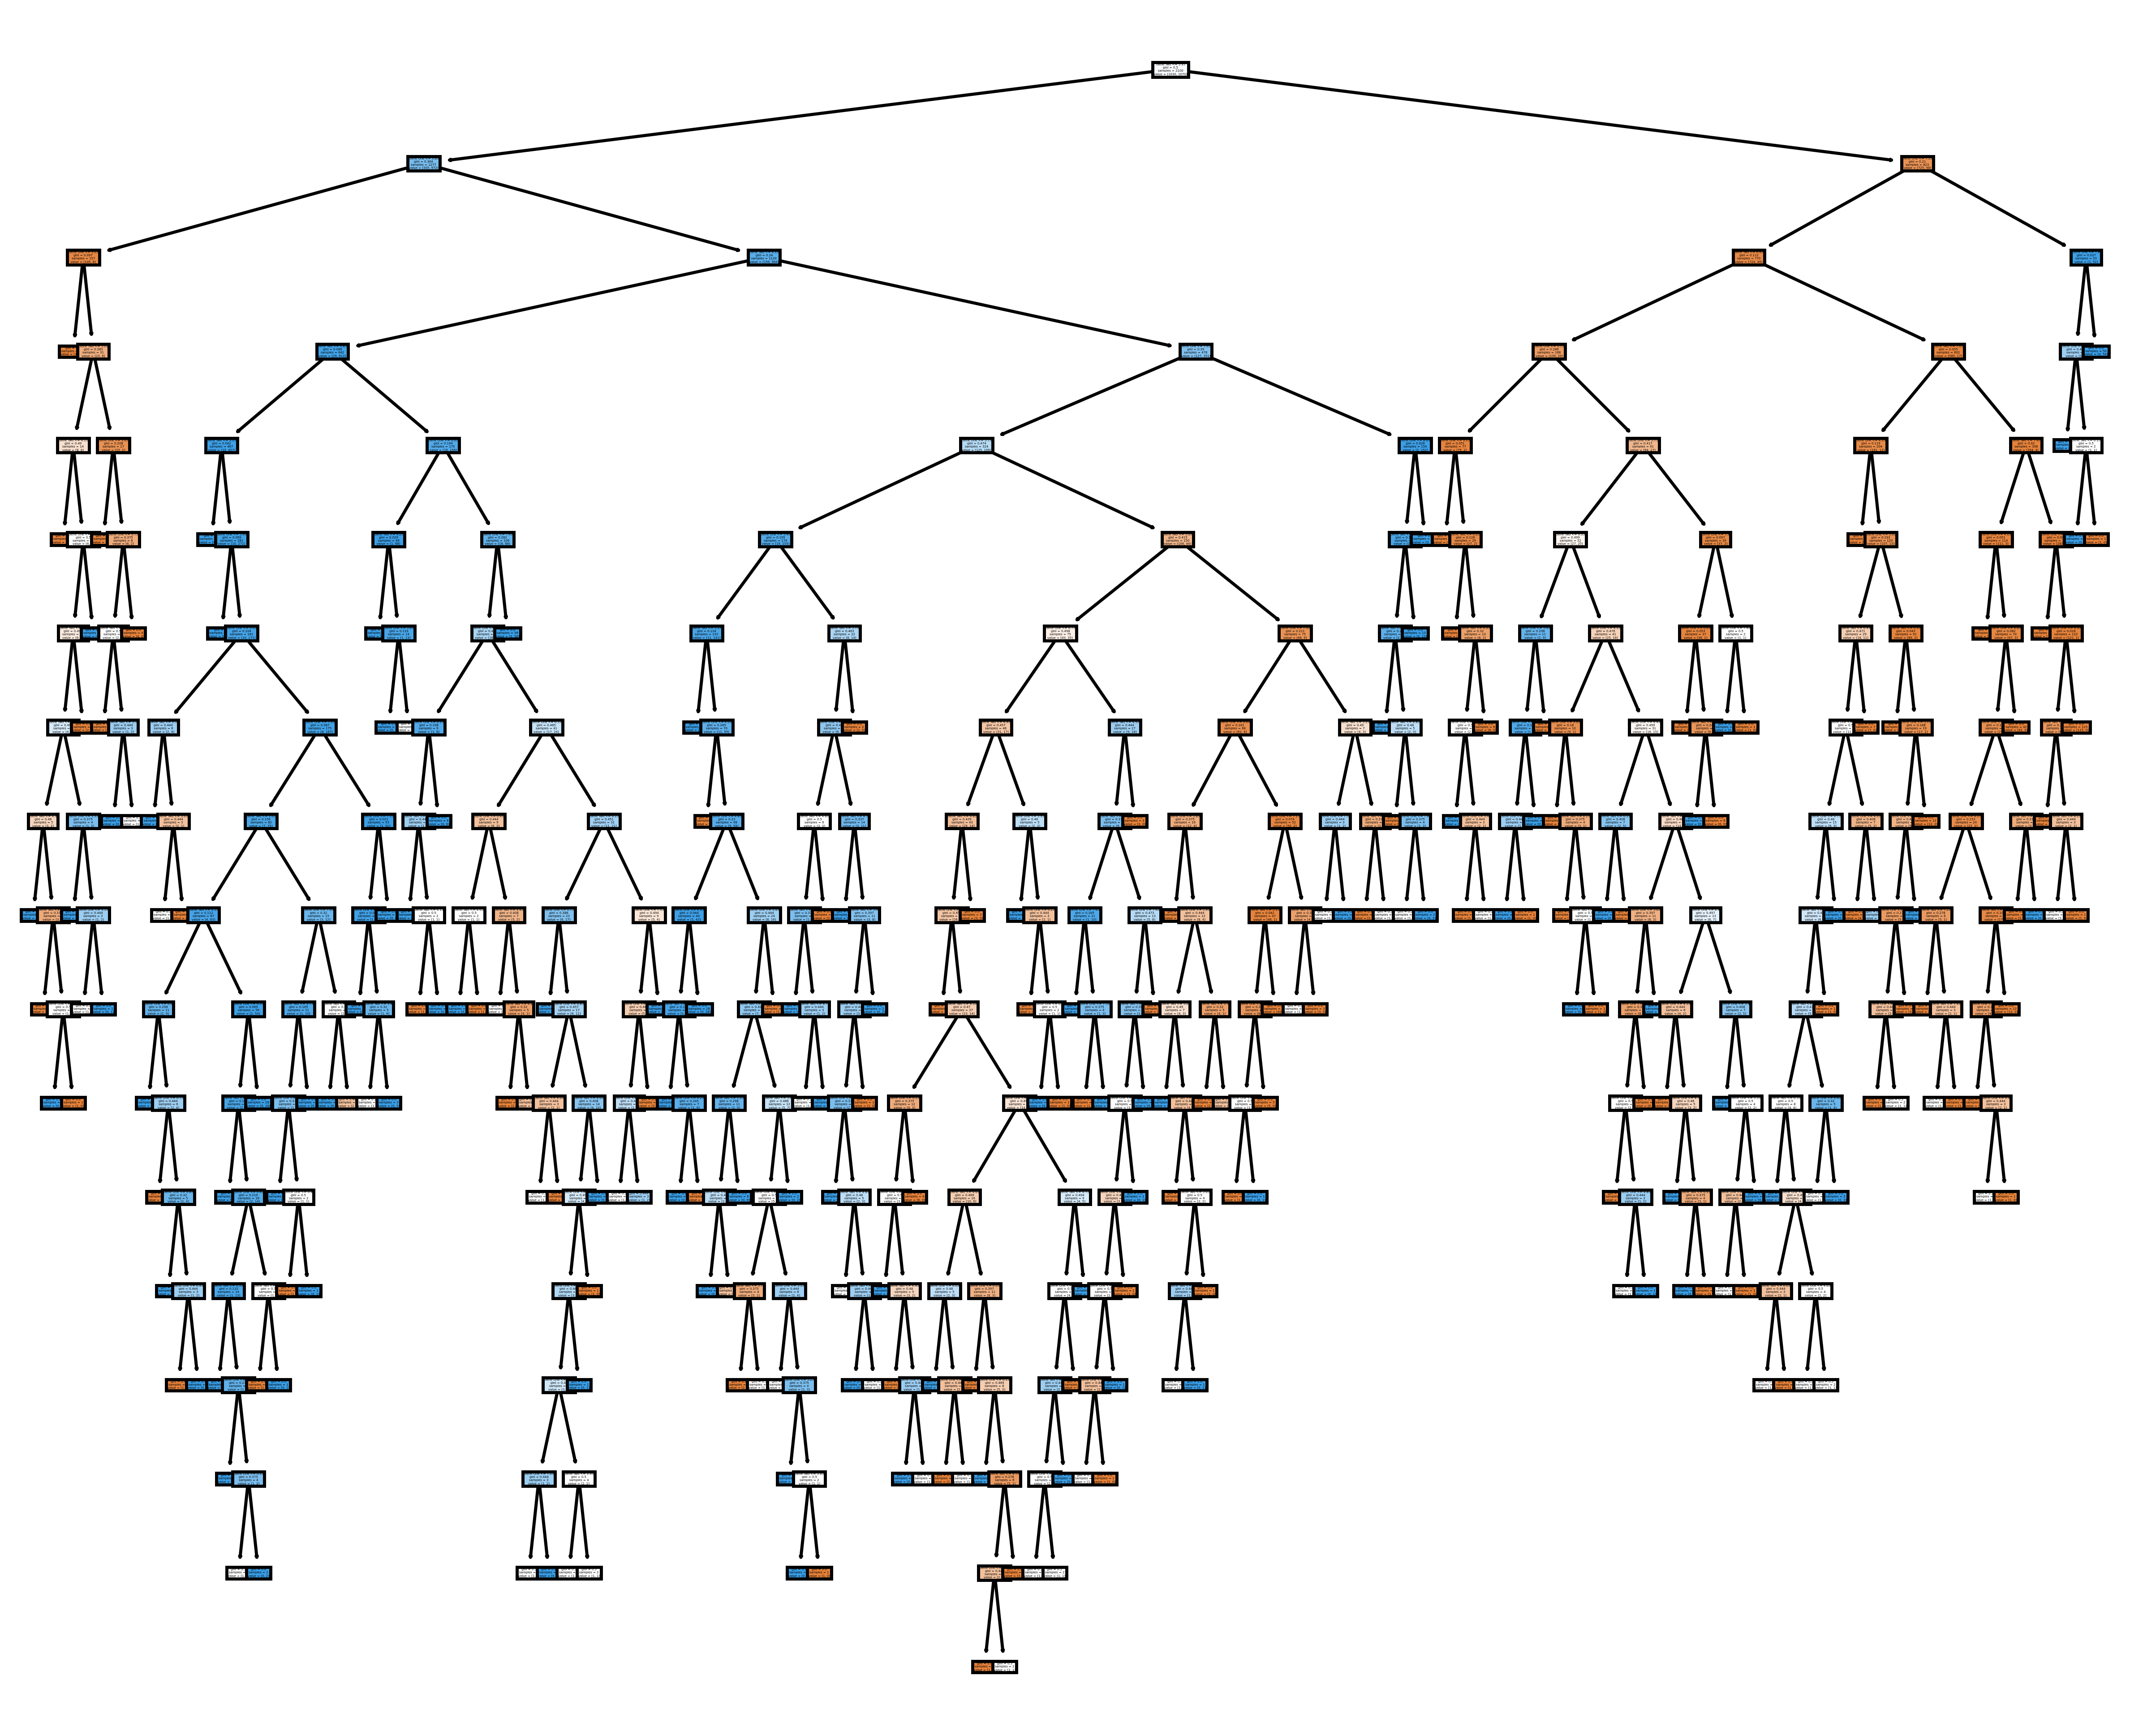

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10),dpi=500)
plot_tree(dtc,filled=True,feature_names= X.columns)
plt.show()

# Optimization prunning 

Train accuracy: 0.9771428571428571
Test accuracy: 0.9022222222222223
[0.89833333 0.91333333 0.9        0.91666667 0.89666667]


0.9049999999999999

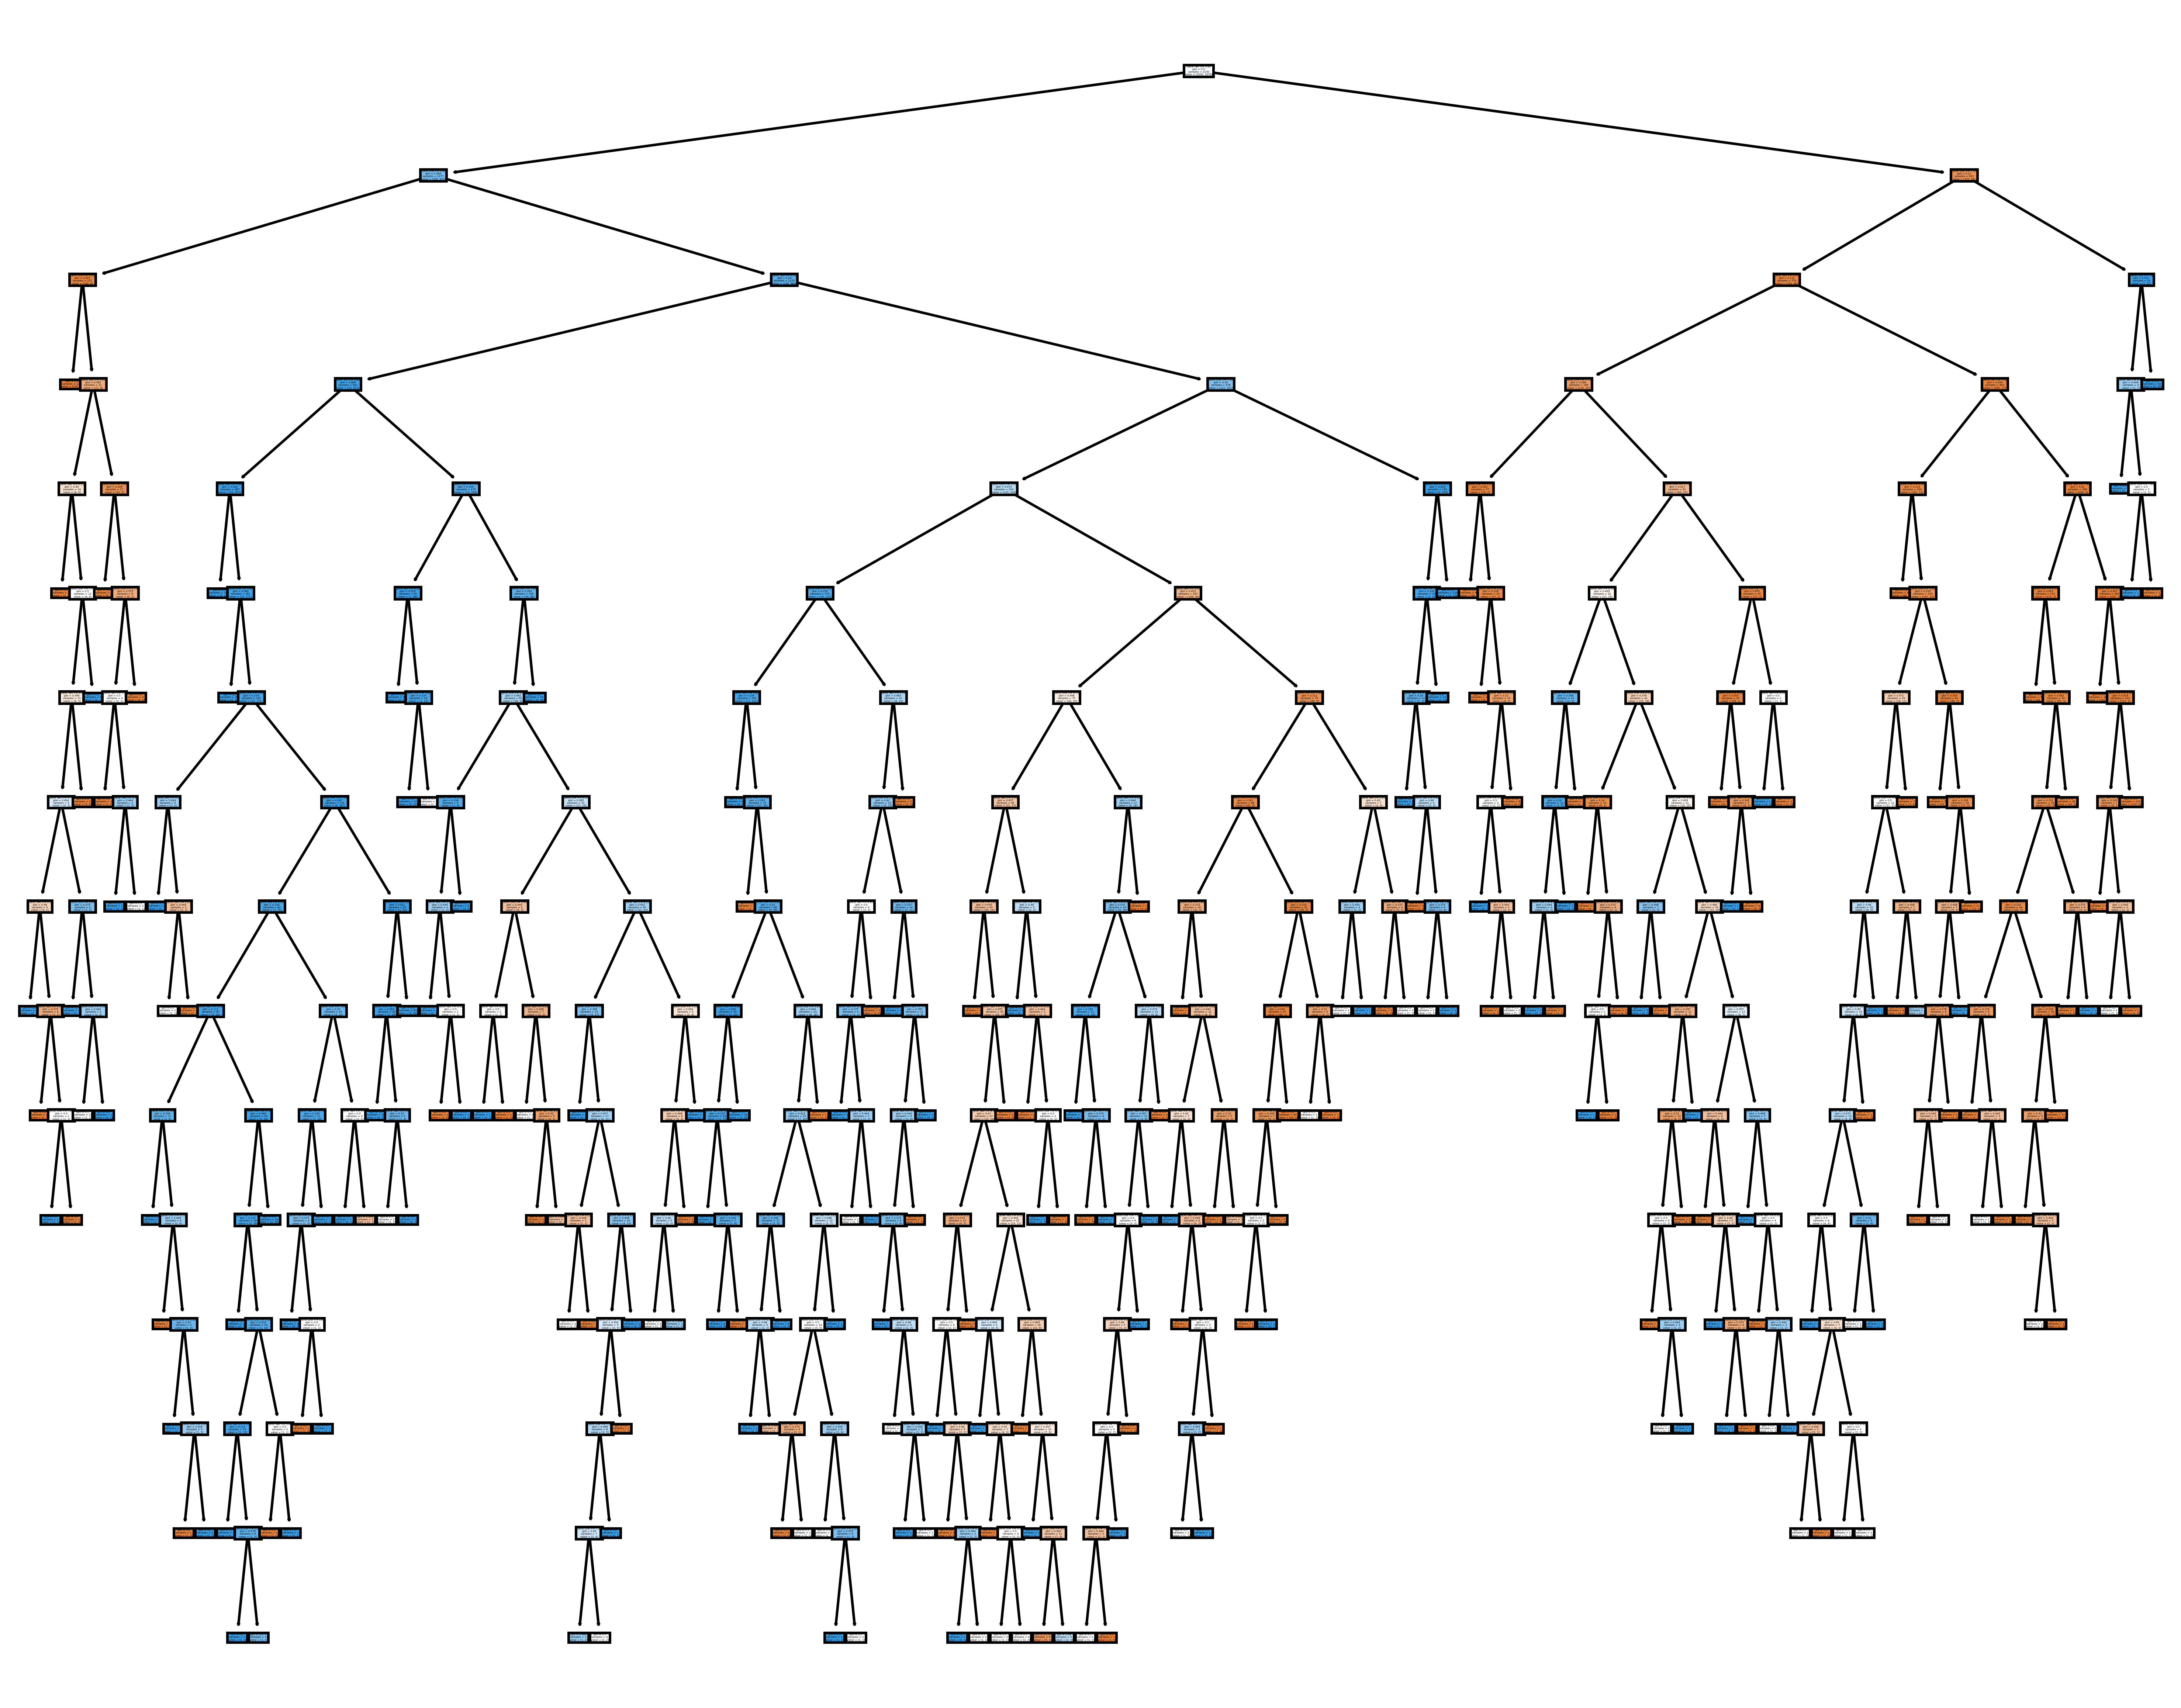

In [53]:
pruned_tree = DecisionTreeClassifier(max_depth=15,random_state=42)
def report_model(dtc):
    dtc.fit(X_train,y_train)
    train_pred=dtc.predict(X_train)
    test_pred= dtc.predict(X_test)
    
    print('Train accuracy:' , accuracy_score(y_train,train_pred))
    print('Test accuracy:' , accuracy_score(y_test,test_pred))
    
    plt.figure(figsize=(15,12),dpi=500)
    plot_tree(dtc,filled=True,feature_names=X.columns)
report_model(pruned_tree)    

score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

# hyperparameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=42)
param_grid= {'max_depth' : list(range(1,8)),'criterion':['gini','entropy']}

Hp_dtc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_dtc.fit(X_train,y_train)

Hp_dtc.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [55]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=42)
param_grid= {'max_leaf_nodes' : list(range(1,20)),'criterion':['gini','entropy']}

Hp_dtc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_dtc.fit(X_train,y_train)

Hp_dtc.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 350, in fit
    check_scalar(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", lin

{'criterion': 'gini', 'max_leaf_nodes': 15}

# rebuilt the final model

Train accuracy: 0.9333333333333333
Test accuracy: 0.94
[0.92       0.93833333 0.91666667 0.92666667 0.93333333]


0.9269999999999999

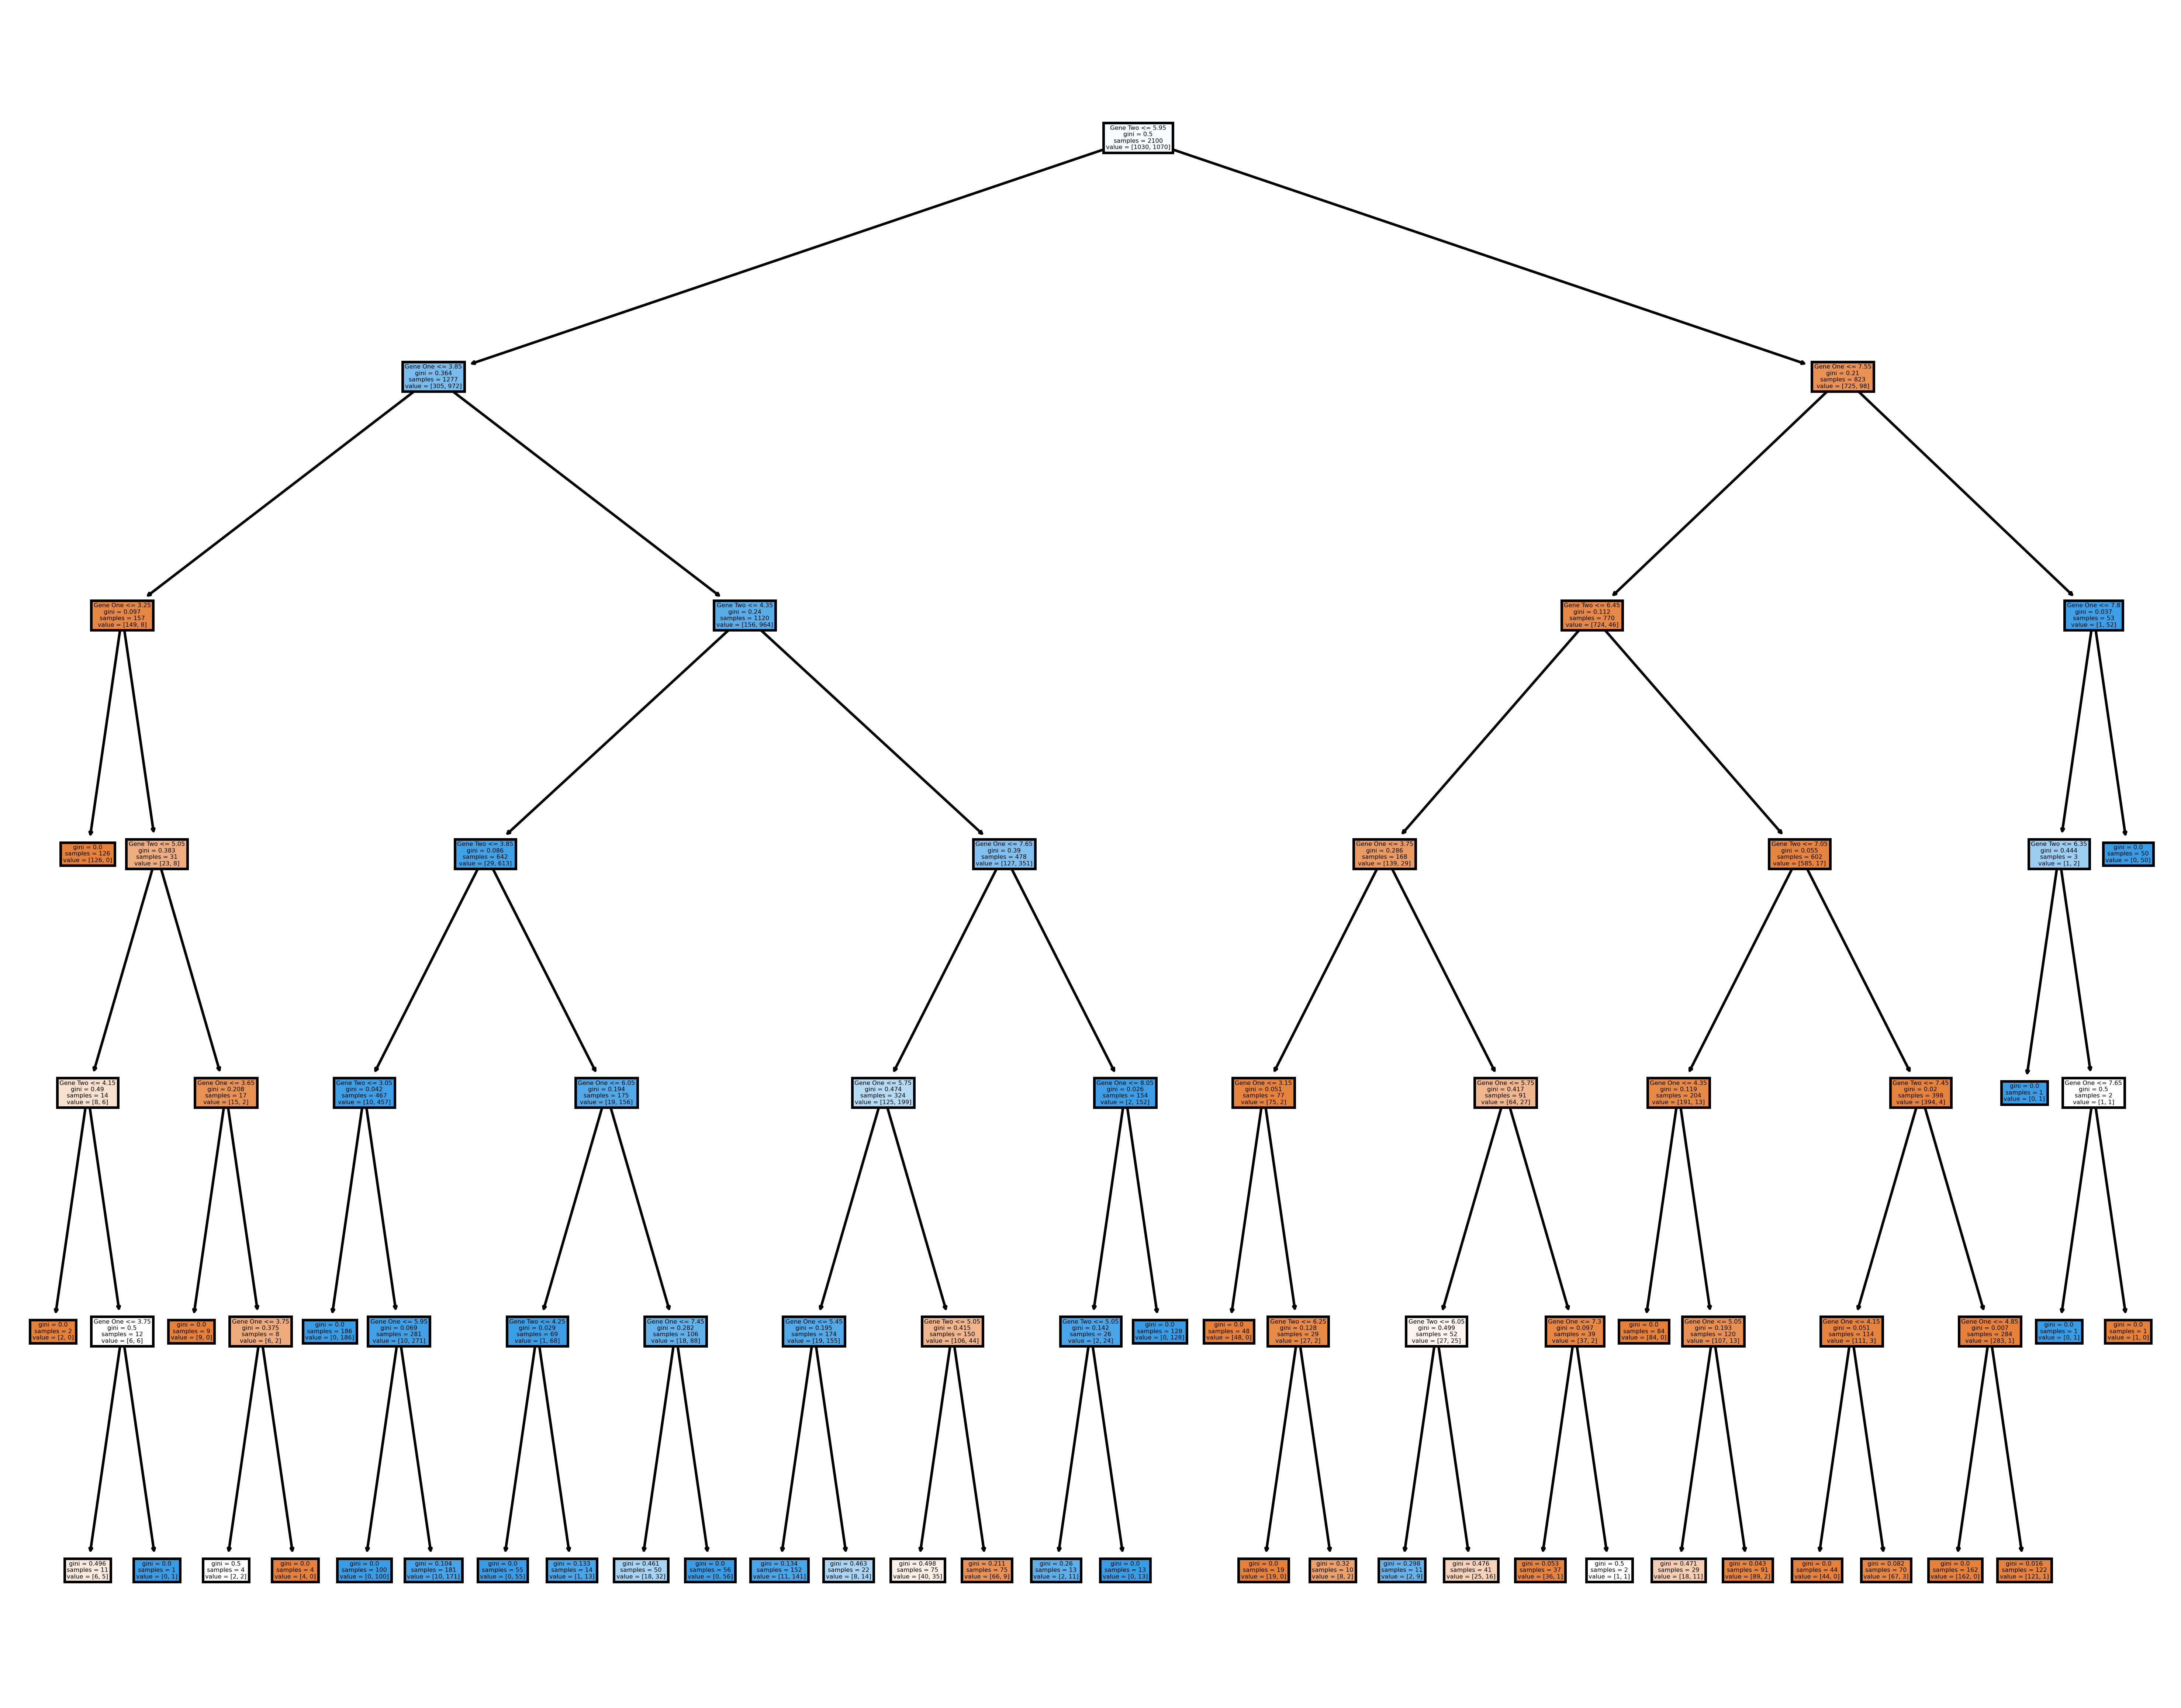

In [56]:
dtc=DecisionTreeClassifier(random_state=42,max_depth=6)
dtc.fit(X_train,y_train)

train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
    
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))
    
plt.figure(figsize=(15,12),dpi=500)
plot_tree(dtc,filled=True,feature_names=X.columns)
   
score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[400,  70],
       [ 59, 371]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


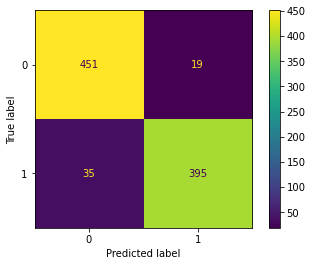

In [58]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,X_test,y_test)

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       470
           1       0.84      0.86      0.85       430

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



# random Forest Technique

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

score.mean()

train accuracy: 0.9066666666666666
test accuracy: 0.9785714285714285
[0.90666667 0.92       0.90833333 0.92166667 0.92833333]


0.917

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[431,  39],
       [ 45, 385]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       470
           1       0.91      0.90      0.90       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


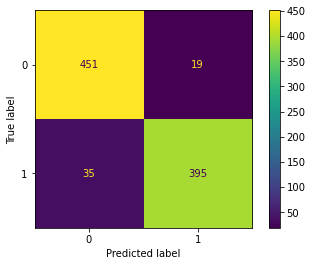

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)


# hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=42)

param_grid= {'max_leaf_nodes' : list(range(1,20))}

Hp_rfc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_rfc.fit(X_train,y_train)

Hp_rfc.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jobl

{'max_leaf_nodes': 14}

# rebuilt the model

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42,max_leaf_nodes=14)
rfc.fit(X_train,y_train)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

score.mean()

train accuracy: 0.9344444444444444
test accuracy: 0.9328571428571428
[0.92833333 0.93833333 0.92       0.92666667 0.94      ]


0.9306666666666666